In [24]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana 
import plotly.graph_objects as go
import geopandas as gpd
from IPython.display import display

In [2]:
!pip install plotly

In [3]:
pois = gpd.read_file("../dataframes/clean_pois_montreal.geojson")


In [4]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [8]:
# calculate the centroid of each POI (as there are some multipolygons in the data, we need to calculate the centroid of each polygon)
pois['geometry'] = pois['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_38421/1972228854.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois['geometry'] = pois['geometry'].centroid


In [9]:
# check crs of the pois
print(pois.crs)   

EPSG:4326


In [10]:
pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923)


In [11]:
polygons = gpd.read_file("/Users/emmastoklundlee/Documents/Social Data Science - Masters/Semester Four/Geospatial Data Science/GDS_project/dataframes/district_polygons.geojson")

In [12]:
# check crs of the polygons
print(polygons.crs)

EPSG:4326


In [13]:
polygons.head()

,Arrondissement,geometry
0,Ahuntsic-Cartierville,"MULTIPOLYGON (((-73.75198 45.51723, -73.75238 ..."
1,Anjou,"POLYGON ((-73.60235 45.61259, -73.60142 45.612..."
2,Côte-des-Neiges–Notre-Dame-de-Grâce,"POLYGON ((-73.61454 45.48366, -73.61240 45.482..."
3,L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Ro...,"MULTIPOLYGON (((-73.75291 45.50364, -73.75307 ..."
4,LaSalle,"MULTIPOLYGON (((-73.63221 45.41484, -73.63203 ..."


In [14]:
# calculate the centroid of each polygon of neighborhoods
polygons['centroids'] = polygons['geometry'].centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_38421/3341021584.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['centroids'] = polygons['geometry'].centroid


In [15]:
# create new centroids GeoDataFrame where geometry is the centroid column
centroids = gpd.GeoDataFrame(polygons, geometry='centroids')

# drop geometry column and rename the centroids column to geometry
centroids = centroids.drop(columns='geometry').rename(columns={'centroids': 'geometry'})

In [16]:
# set column named geometry as the active geometry column
centroids = gpd.GeoDataFrame(centroids, geometry='geometry')

In [17]:
centroids.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:

# Assuming `amenities_gdf` is your GeoDataFrame containing amenities with points
# Assuming `neighbourhoods_gdf` is your GeoDataFrame containing neighborhoods with polygons

# Perform spatial join
amenities_with_neighborhood = gpd.sjoin(pois, polygons, how="left", op="within")

# Now `amenities_with_neighborhood` contains a new column 'neighbourhood' 
# which indicates the neighborhood each amenity point falls within


/Users/emmastoklundlee/opt/anaconda3/envs/gensim_update/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422)


In [20]:
amenities_with_neighborhood['Arrondissement'].value_counts()

Arrondissement
Ville-Marie                                            1551
Le Plateau-Mont-Royal                                   921
Côte-des-Neiges–Notre-Dame-de-Grâce                     827
Rosemont–La Petite-Patrie                               781
Villeray–Saint-Michel–Parc-Extension                    466
Ahuntsic-Cartierville                                   432
Le Sud-Ouest                                            390
Mercier–Hochelaga-Maisonneuve                           389
Verdun                                                  277
Saint-Laurent                                           248
L'Île-Bizard–Sainte-Geneviève / Pierrefonds-Roxboro     190
LaSalle                                                 173
Saint-Léonard                                           151
Rivière-des-Prairies–Pointe-aux-Trembles                119
Outremont                                               116
Lachine                                                 109
Montréal-Nord            

In [18]:

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
# first, we need to create a GeoDataFrame from the centroids
# polygons = polygons.set_index('Arrondissement')
# amenities_with_neighborhood['Arrondissement'] = amenities_with_neighborhood['Arrondissement'].astype(str)
# polygons['Arrondissement'] = polygons['Arrondissement'].astype(str)

# join the centroids to the amenities
# amenities_with_neighborhood = amenities_with_neighborhood.join(polygons, on='Arrondissement', rsuffix='_centroid')

# calculate the distance between each amenity and the centroid of the neighborhood it falls within
amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)

# Now `amenities_with_neighborhood` contains a new column 'distance_to_centroid'
# which indicates the distance between each amenity and the centroid of the neighborhood it falls within

# Now you can filter the amenities based on the distance to the centroid
# For example, to get all amenities within 500 meters of the centroid
# amenities_within_500m = amenities_with_neighborhood[amenities_with_neighborhood['distance_to_centroid'] <= 500]






/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_25049/2634055832.py:11: UserWarning: The indices of the two GeoSeries are different.
  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)
/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_25049/2634055832.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons.geometry)


In [19]:
amenities_with_neighborhood.centroid

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_25049/667464992.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood.centroid


0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Length: 7283, dtype: geometry

In [20]:
amenities_with_neighborhood.geometry

0       POINT (-73.66345 45.54186)
1       POINT (-73.66300 45.54201)
2       POINT (-73.67232 45.54761)
3       POINT (-73.67179 45.54839)
4       POINT (-73.67196 45.54923)
                   ...            
7278    POINT (-73.59239 45.43413)
7279    POINT (-73.59732 45.43048)
7280    POINT (-73.64404 45.46111)
7281    POINT (-73.62281 45.50163)
7282    POINT (-73.62500 45.50306)
Name: geometry, Length: 7283, dtype: geometry

In [21]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,centroids,distance_to_centroid
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.000000
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091483
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.044636
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.091192
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,POINT (-73.67738 45.54422),0.107767


In [22]:
amenities_with_neighborhood['distance_to_centroid'].describe()

count    18.000000
mean      0.066927
std       0.037825
min       0.000000
25%       0.045595
50%       0.070577
75%       0.091411
max       0.132553
Name: distance_to_centroid, dtype: float64

In [23]:
polygons_centroids = amenities_with_neighborhood[['Arrondissement','centroids']].copy()

amenities_with_neighborhood.drop(columns=['centroids'], inplace=True)

amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons_centroids.centroids)

amenities_with_neighborhood['distance_in_m'] = amenities_with_neighborhood['distance_to_centroid']*111195

/var/folders/3m/k0nn68mj0ylfjxzs4mcl9_f00000gn/T/ipykernel_25049/3535840443.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities_with_neighborhood['distance_to_centroid'] = amenities_with_neighborhood.geometry.distance(polygons_centroids.centroids)


In [24]:
len(polygons_centroids)

7283

In [25]:
len(amenities_with_neighborhood)

7283

In [26]:
amenities_with_neighborhood.head()

,element_type,osmid,direction,amenity,name,category,geometry,index_right,Arrondissement,distance_to_centroid,distance_in_m
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-73.66345 45.54186),0.0,Ahuntsic-Cartierville,0.014123,1570.383871
1,node,190646563,None,post_box,None,Post,POINT (-73.66300 45.54201),0.0,Ahuntsic-Cartierville,0.014546,1617.422492
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-73.67232 45.54761),0.0,Ahuntsic-Cartierville,0.006091,677.287252
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-73.67179 45.54839),0.0,Ahuntsic-Cartierville,0.006973,775.388307
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-73.67196 45.54923),0.0,Ahuntsic-Cartierville,0.007381,820.760929


In [27]:
amenities_with_neighborhood.columns

Index(['element_type', 'osmid', 'direction', 'amenity', 'name', 'category',
       'geometry', 'index_right', 'Arrondissement', 'distance_to_centroid',
       'distance_in_m'],
      dtype='object')

In [28]:
# create function to loop through each category type and each neighbourhood and calculate average distance_in_m
def calculate_average_distance(df):
    average_distances = []
    for category in df['category'].unique():
        for neighbourhood in df['Arrondissement'].unique():
            average_distance = df[(df['category'] == category) & (df['Arrondissement'] == neighbourhood)]['distance_in_m'].mean()
            average_distances.append([category, neighbourhood, average_distance])
# Create a DataFrame from the list
    result_df = pd.DataFrame(average_distances, columns=['Category', 'Neighbourhood', 'Average Distance'])
    return result_df

In [29]:
ave_distance_df = calculate_average_distance(amenities_with_neighborhood)

In [30]:
cloropleth_df = pd.merge(ave_distance_df, polygons, left_on='Neighbourhood', right_on='Arrondissement', how='left')

# Drop the redundant 'Arrondissement' column
cloropleth_df.drop('Arrondissement', axis=1, inplace=True)

In [61]:
# drop rows where category is nan
cloropleth_df = cloropleth_df.dropna(subset=['Category'])

In [68]:
# capitalise first letter of each word in category
cloropleth_df['Category'] = cloropleth_df['Category'].str.title()

# rename Bank/atm to Bank/ATM
cloropleth_df['Category'] = cloropleth_df['Category'].replace('Bank/Atm', 'Bank/ATM')

In [63]:
# distance statistical summary
cloropleth_df['Average Distance'].describe()

count     202.000000
mean     2281.953381
std      1223.956694
min       252.789194
25%      1474.513078
50%      1959.857895
75%      2849.535261
max      8718.451316
Name: Average Distance, dtype: float64

In [64]:
# count number above 5000m
cloropleth_df[cloropleth_df['Average Distance'] > 5000].count()

Category            11
Neighbourhood       11
Average Distance    11
geometry            11
centroids           11
dtype: int64

In [65]:
cloropleth_df.head()

,Category,Neighbourhood,Average Distance,geometry,centroids
0,Restaurant/cafe,Ahuntsic-Cartierville,2859.869027,"MULTIPOLYGON (((-73.75198 45.51723, -73.75238 ...",POINT (-73.67738 45.54422)
1,Restaurant/cafe,Verdun,992.108761,"MULTIPOLYGON (((-73.59074 45.44690, -73.59094 ...",POINT (-73.56492 45.45643)
2,Restaurant/cafe,Ville-Marie,1436.255860,"MULTIPOLYGON (((-73.51949 45.49566, -73.51977 ...",POINT (-73.56225 45.50981)
3,Restaurant/cafe,Le Plateau-Mont-Royal,1293.323714,"POLYGON ((-73.56146 45.54015, -73.56105 45.540...",POINT (-73.58075 45.52609)
4,Restaurant/cafe,Outremont,932.449592,"POLYGON ((-73.62078 45.52365, -73.62020 45.524...",POINT (-73.60866 45.51562)


In [32]:
# # set nan values in the 'Average Distance' column to 0
# cloropleth_df['Average Distance'] = cloropleth_df['Average Distance'].fillna(0)

# # drop the rest of the nan values
# cloropleth_df = cloropleth_df.dropna()


In [33]:
# # Uncomment to plot the cloropleth map with matplotlib
# # Convert the DataFrame to a GeoDataFrame
# cloropleth_gdf = gpd.GeoDataFrame(cloropleth_df, geometry='geometry')

# # Get unique category types
# categories = cloropleth_gdf['Category'].unique()

# # Increase the size of the maps
# fig, ax = plt.subplots(len(categories), 1, figsize=(10, 10 * len(categories)))

# # Plot choropleth map for each category
# for i, category in enumerate(categories):
#     category_df = cloropleth_gdf[cloropleth_gdf['Category'] == category]
    
#     category_df.plot(column='Average Distance', ax=ax[i], legend=True, cmap='viridis', legend_kwds={'label': "Average Distance (m)"})
#     ax[i].set_title(f'Average Distance to Centroid for {category} in Montreal')
    
#     # Add neighborhood names
#     for _, row in category_df.iterrows():
#         ax[i].text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['Neighbourhood'], fontsize=6, ha='center')
    
#     # Remove axes
#     ax[i].axis('off')

# plt.tight_layout()
# plt.show()









In [67]:
# # uncomment to plot the cloropleth map with plotly
# import plotly.graph_objs as go
# import geopandas as gpd

# # Convert the DataFrame to a GeoDataFrame
# cloropleth_gdf = gpd.GeoDataFrame(cloropleth_df, geometry='geometry')

# # Get unique category types
# categories = cloropleth_gdf['Category'].unique()

# # Create choropleth maps for each category
# figs = []
# for category in categories:
#     category_df = cloropleth_gdf[cloropleth_gdf['Category'] == category]
    
#     # Create choropleth map figure
#     fig = go.Figure()
    
#     # Add choropleth map trace
#     fig.add_trace(go.Choroplethmapbox(
#         geojson=category_df.geometry.__geo_interface__,
#         locations=category_df.index,
#         z=category_df['Average Distance'],
#         colorscale='Viridis',
#         colorbar=dict(title='Average Distance (m)'),
#         marker_opacity=0.7,
#         marker_line_width=0,
#         text=category_df['Neighbourhood'],
#         hoverinfo='text+z'
#     ))

#     # Update layout
#     fig.update_layout(
#         mapbox=dict(
#             style="carto-positron",
#             zoom=10,
#             center=dict(lat=45.5, lon=-73.6),
#         ),
#         margin=dict(l=0, r=0, t=0, b=0),
#     )

#     # Add title
#     fig.update_layout(title_text=f'Average Distance to Centroid for {category} in Montreal')

#     figs.append(fig)

# # Display figures
# for fig in figs:
#     fig.show()


In [91]:
# drop centroid column from the cloropleth_gdf
cloropleth_gdf.drop(columns=['centroids'], inplace=True)
# save cloropleth_gdf as a geojson file
cloropleth_gdf.to_file("/Users/emmastoklundlee/Documents/Social Data Science - Masters/Semester Four/Geospatial Data Science/GDS_project/dataframes/cloropleth_gdf.geojson", driver='GeoJSON')

In [92]:
# should be able to run the following without running the above cells



# read in the cloropleth_gdf
cloropleth_gdf = gpd.read_file("/Users/emmastoklundlee/Documents/Social Data Science - Masters/Semester Four/Geospatial Data Science/GDS_project/dataframes/cloropleth_gdf.geojson")

# Get unique category types
categories = cloropleth_gdf['Category'].unique()

# Define initial category for the plot
initial_category = categories[0]

# Filter DataFrame for initial category
initial_category_df = cloropleth_gdf[cloropleth_gdf['Category'] == initial_category]

# Create choropleth map figure
fig = go.Figure()

# Add initial choropleth map trace
fig.add_trace(go.Choroplethmapbox(
    geojson=initial_category_df.geometry.__geo_interface__,
    locations=initial_category_df.index,
    z=initial_category_df['Average Distance'],
    colorscale='Viridis',
    colorbar=dict(title='Average Distance (m)'),
    marker_opacity=0.7,
    marker_line_width=0,
    text=initial_category_df['Neighbourhood'],
    hoverinfo='text+z',
    zmin=0,
    zmax=5500  # Set the maximum value for the legend
))

# Update layout
fig.update_layout(
    title=f'Average Distance to Amenity in Montreal',
    mapbox=dict(
        style="carto-positron",
        zoom=9.4,
        center=dict(lat=45.55, lon=-73.6),
    ),
    margin=dict(l=0, r=0, t=0, b=0),
)

# Define dropdown menu
dropdown_menu = []
for category in categories:
    category_df = cloropleth_gdf[cloropleth_gdf['Category'] == category]
    dropdown_menu.append(
        dict(
            args=[{'z': [category_df['Average Distance']],
                   'text': [category_df['Neighbourhood']],
                   'hoverinfo': 'text+z',
                   'title': f'Average Distance to Centroid for {category} in Montreal'}],
            label=category,
            method='restyle'
        )
    )

# Add dropdown menu to the figure
fig.update_layout(updatemenus=[dict(
    buttons=dropdown_menu,
    direction="down",
    pad={"r": 10, "t": 10},
    showactive=True,
    x=0.95,  # Adjust the position to the right
    xanchor="right",  # Align to the right
    y=1.15,
    yanchor="top"
)])

# Display the plot
display(fig)


### Creating choropleth map with amenities count

Want to maybe use the not cleaned dataset since we drop amenities in the cleaned version

In [21]:
# use amenities_with_neighborhood to create a count of amenities in each neighbourhood
amenities_count = amenities_with_neighborhood.groupby(['Arrondissement', 'category']).size().reset_index(name='count')


In [22]:
# create a choropleth map of the count of amenities in each neighbourhood
# merge the count of amenities with the polygons
amenities_count = pd.merge(amenities_count, polygons, left_on='Arrondissement', right_on='Arrondissement', how='left')

# drop the redundant 'Arrondissement' column
amenities_count.drop('Arrondissement', axis=1, inplace=True)

# convert the DataFrame to a GeoDataFrame
amenities_count_gdf = gpd.GeoDataFrame(amenities_count, geometry='geometry')


In [25]:
# create a choropleth map of the count of amenities in each neighbourhood
fig = go.Figure()

# Add choropleth map trace
fig.add_trace(go.Choroplethmapbox(
    geojson=amenities_count_gdf.geometry.__geo_interface__,
    locations=amenities_count_gdf.index,
    z=amenities_count_gdf['count'],
    colorscale='Viridis',
    colorbar=dict(title='Number of Amenities'),
    marker_opacity=0.7,
    marker_line_width=0,
    text=amenities_count_gdf['category'],
    hoverinfo='text+z'
))

# Update layout
fig.update_layout(
    title='Number of Amenities in Montreal',
    mapbox=dict(
        style="carto-positron",
        zoom=9.4,
        center=dict(lat=45.55, lon=-73.6),
    ),
    margin=dict(l=0, r=0, t=0, b=0),
)

# Display the plot
display(fig)



In [35]:
# following is taken from exercise 10 solutions 

# the below can maybe be deleted from this version 

# TRY GETTING THIS TO WORK FOR US

In [36]:
place = 'Montreal, Canada'
G_walk = ox.graph_from_place(place, network_type='walk')

KeyboardInterrupt: 

In [ ]:
place = 'Anjou, Montreal, Canada'
G_walk_anjou = ox.graph_from_place(place, network_type='walk')

In [ ]:
# specify parameters for the analysis
walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx


In [ ]:
# set a uniform walking speed on every edge
for u, v, data in G_walk_anjou.edges(data=True):
    data['speed_kph'] = walk_speed
G_walk_anjou = ox.add_edge_travel_times(G_walk_anjou) # this computes the travel time in seconds based on the 'speed_kph' column

In [ ]:
# set a uniform walking speed on every edge
for u, v, data in G_walk.edges(data=True):
    data['speed_kph'] = walk_speed
G_walk = ox.add_edge_travel_times(G_walk) # this computes the travel time in seconds based on the 'speed_kph' column

In [ ]:
# Get all the "fresh food" stores on OSM within the study site
tags = {'amenity': ['restaurant', 'cafe']}


amenities = ox.features_from_place(place, tags=tags)

amenities = amenities.to_crs('EPSG:25832')

amenities.shape

(10, 22)

In [ ]:
amenities.head(25)

addr:housenumber addr:postcode addr:province  \
element_type osmid                                                     
node         2496360540             7275       H1M 2W2            QC   
             2496360543             7225       H1M 2W2            QC   
             2496360545             7265       H1M 2W2            QC   
             2496360564             7999       H1M 1W9            QC   

                                            addr:street  \
element_type osmid                                        
node         2496360540  Boulevard des Galeries d'Anjou   
             2496360543  Boulevard des Galeries d'Anjou   
             2496360545  Boulevard des Galeries d'Anjou   
             2496360564  Boulevard des Galeries d'Anjou   

                                           addr:suburb     amenity  \
element_type osmid                                                   
node         2496360540  Mercier-Hochelaga-Maisonneuve  restaurant   
             2496360543  Mercier-Hochelaga-Maisonneuve  restaurant   
             2496360545  Mercier-Hochelaga-Maisonneuve  restaurant   
             2496360564  Mercier-Hochelaga-Maisonneuve  restaurant   

                        internet_access internet_access:fee  \
element_type osmid                                            
node         2496360540            wlan                  no   
             2496360543            wlan                  no   
             2496360545            wlan                  no   
             2496360564            wlan                 NaN   

                        internet_access:operator  \
element_type osmid                                 
node         2496360540             Île Sans Fil   
             2496360543             Île Sans Fil   
             2496360545                      NaN   
             2496360564                      NaN   

                                                  name            phone  \
element_type osmid                                                        
node         2496360540                     L'Académie  +1 514 798 8222   
             2496360543                      3 Brewers  +1 514 351 5591   
             2496360545  Madisons New York Grill & Bar  +1 514 351 1221   
             2496360564           ZIBO! Restaurant-Bar  +1 514 903 2509   

                                                  website  \
element_type osmid                                          
node         2496360540         https://www.lacademie.ca/   
             2496360543     https://www.les3brasseurs.ca/   
             2496360545      https://www.madisonsnyc.com/   
             2496360564  https://www.restaurantszibo.com/   

                                                 geometry        brand  \
element_type osmid                                                       
node         2496360540  POINT (-4959026.580 9193741.734)          NaN   
             2496360543  POINT (-4959042.706 9193580.492)  3 Brasseurs   
             2496360545  POINT (-4959036.366 9193685.692)          NaN   
             2496360564  POINT (-4958387.145 9194170.649)          NaN   

                        brand:wikidata     brand:wikipedia  \
element_type osmid                                           
node         2496360540            NaN                 NaN   
             2496360543       Q3230326  fr:Les 3 Brasseurs   
             2496360545            NaN                 NaN   
             2496360564            NaN                 NaN   

                                      cuisine      name:fr    official_name  
element_type osmid                                                           
node         2496360540                   NaN          NaN              NaN  
             2496360543  burger;pizza;seafood  3 Brasseurs  Les 3 Brasseurs  
             2496360545                   NaN          NaN              NaN  
             2496360564                   NaN          NaN              NaN

In [ ]:
# list the column names of amenities
amenities.columns

Index(['geometry', 'amenity', 'name', 'created_by', 'source', 'addr:city',
       'addr:housenumber', 'addr:postcode', 'addr:province', 'addr:street',
       ...
       'store_name', 'grade', 'architect', 'architect:wikidata',
       'student:count:primary', 'student:count:secondary', 'indoor',
       'level_name', 'ways', 'type'],
      dtype='object', length=208)

In [ ]:
# pois.to_crs('EPSG:25832', inplace=True)

In [ ]:
# pois.head()

,element_type,osmid,direction,amenity,name,category,geometry
0,node,189770160,None,restaurant,GP Restaurant,Restaurant/cafe,POINT (-4969379.074 9203051.669)
1,node,190646563,None,post_box,None,Post,POINT (-4969347.157 9203007.507)
2,node,191024110,None,restaurant,Pizza Roni,Restaurant/cafe,POINT (-4968676.240 9204153.871)
3,node,191024149,None,restaurant,La Crèmière,Restaurant/cafe,POINT (-4968547.713 9204118.775)
4,node,191024164,None,restaurant,Le Palais du Chausson et de la Pizza,Restaurant/cafe,POINT (-4968423.257 9204159.809)


In [ ]:
# construct the pandana network
# For this we first need the nodes and edges as geodataframes

G_walk = ox.project_graph(G_walk, to_crs='EPSG:25832')

nodes = ox.graph_to_gdfs(G_walk, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(G_walk, nodes=False).reset_index()[['u', 'v', 'travel_time']]

network = pandana.Network(node_x=nodes['x'],
                          node_y=nodes['y'], 
                          edge_from=edges['u'],
                          edge_to=edges['v'],
                          edge_weights=edges[['travel_time']])

Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 146028
Setting CH edge vector of size 469352
Range graph removed 474478 edges of 938704
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [ ]:
G_walk_anjou = ox.project_graph(G_walk_anjou, to_crs='EPSG:25832')

nodes = ox.graph_to_gdfs(G_walk_anjou, edges=False)[['x', 'y']]
edges = ox.graph_to_gdfs(G_walk_anjou, nodes=False).reset_index()[['u', 'v', 'travel_time']]

network = pandana.Network(node_x=nodes['x'],
                          node_y=nodes['y'], 
                          edge_from=edges['u'],
                          edge_to=edges['v'],
                          edge_weights=edges[['travel_time']])



Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

In [ ]:
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
centroids = amenities.centroid

# set the amenities' locations on the network 
network.set_pois(category='restaurant',
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)

In [ ]:
network

In [ ]:
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
# centroids = amenities.centroid

# # set the amenities' locations on the network 
# network.set_pois(category=pois['Restaurant/cafe'],
#                  maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
#                  maxitems=3,
#                  x_col=centroids.x, 
#                  y_col=centroids.y)


KeyError: 'Restaurant/cafe'

In [ ]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='restaurant',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
224886238,900,900,900
596644170,900,900,900
4502353385,900,900,900
224911443,900,900,900
8875463868,900,900,900


The `distances` dataframe contains the osmid of each node and the distance in seconds to the three closest amenities (based on our provided walking speed).

OSMnx works with travel distances in seconds, but let's convert it to minutes for a more meaningful value:

In [ ]:
distances['travel_time'] = distances[1] / 60

In [ ]:
distances

,1,2,3,travel_time
osmid,,,,
224886238,900.000000,900.000000,900.000000,15.000000
596644170,900.000000,900.000000,900.000000,15.000000
4502353385,900.000000,900.000000,900.000000,15.000000
224911443,900.000000,900.000000,900.000000,15.000000
8875463868,900.000000,900.000000,900.000000,15.000000
...,...,...,...,...
11662037419,332.100006,344.700012,385.700012,5.535000
11662037462,413.899994,426.500000,467.500000,6.898333
11662037420,311.000000,323.600006,364.600006,5.183333


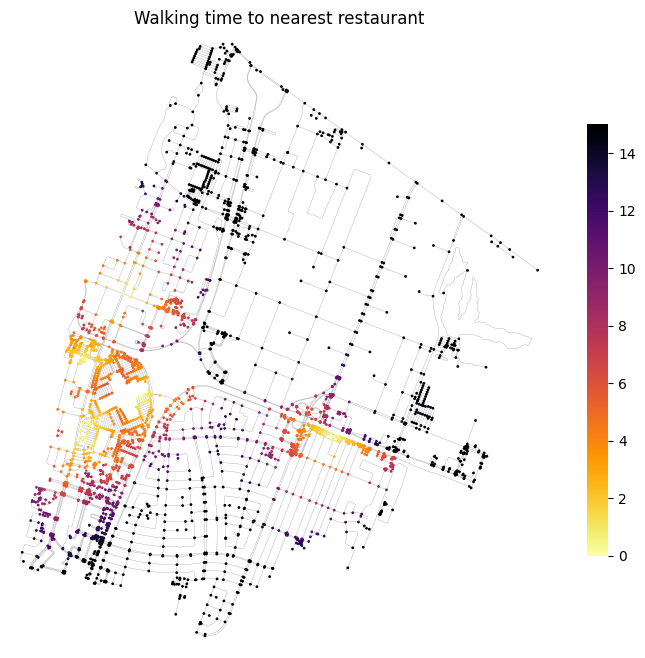

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot distance to nearest amenity from each node
ox.plot_graph(G_walk_anjou, ax=ax, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='inferno_r')

ax.set_title('Walking time to nearest restaurant')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')


In [ ]:

# set the amenities' locations on the network 
network.set_pois(category='Health care',
                 maxdist=walk_time_sec, # here we are using the max travel time in seconds to match the units used when computing edge travel times
                 maxitems=3,
                 x_col=centroids.x, 
                 y_col=centroids.y)

In [ ]:
# calculate travel time to nearest 3 amenities from each node in network
distances = network.nearest_pois(distance=walk_time_sec,
                                 category='Health care',
                                 num_pois=3)
distances.astype(int).head()

,1,2,3
osmid,,,
26232418,9,9,9
1653821632,4,5,13
11322670493,3,3,14
11340718245,4,12,12
11340718237,5,5,5


In [ ]:
distances['travel_time'] = distances[1] / 60

In [ ]:
distances

,1,2,3,travel_time
osmid,,,,
26232418,9.000000,9.000000,9.100000,0.150000
1653821632,4.900000,5.900000,13.700000,0.081667
11322670493,3.500000,3.500000,14.000000,0.058333
11340718245,4.900000,12.600000,12.600000,0.081667
11340718237,5.200000,5.200000,5.800000,0.086667
...,...,...,...,...
11837611683,43.099998,43.099998,103.599998,0.718333
11837611736,148.600006,231.899994,240.600006,2.476667
11837611738,181.500000,264.799988,273.500000,3.025000


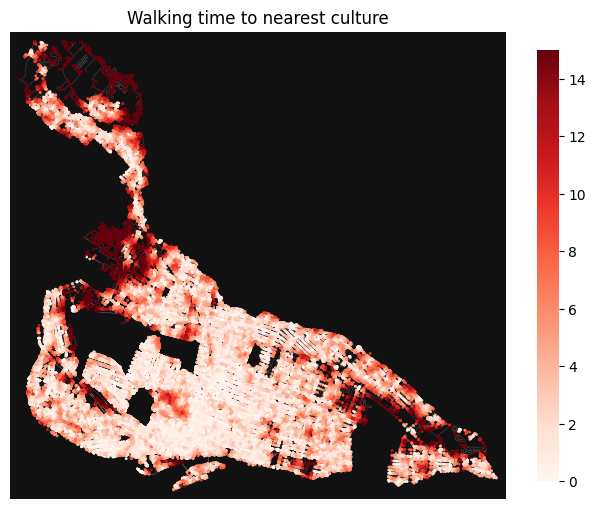

In [ ]:
# Plot distance to nearest amenity from each node
fig, ax = ox.plot_graph(G_walk, node_size=0, edge_linewidth=0.1,
                        edge_color='gray', show=False, close=False)

sc = ax.scatter(x=nodes['x'],
                y=nodes['y'], 
                c=distances['travel_time'], # column to plot (distance to nearest store)
                s=1, # size
                cmap='Reds')

ax.set_title('Walking time to nearest culture')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')